In [28]:
rm(list=ls())
library(foreign)
library(TSA)
library(zoo)
library(eventstudies)
library(tseries)
# library(strucchange) not available under certain versions
library(urca)
library(changepoint)
library(forecast)
library(MASS)

read the data (only germany)

In [29]:
ger <- read.dta("/Users/tpliu/Do-Scandals-Matter-An-Interrupted-Time-Series-Design-on-Three-Cases/Data/DAYPOLLS_GER.dta")

create the date (based on stata)

In [30]:
ger$date <- seq(as.Date("1957-09-16"),as.Date("2013-09-22"), by="day")

subset the data

In [31]:
geroa <- ger[ger$date >= "2000-01-01",]

reducing the data

In [32]:
geroar <- cbind(geroa$poll_p1_ipo, geroa$poll_p4_ipo)

create the daily times series data

In [33]:
geroar <- zoo(geroar, geroa$date)

name the column (don't need for date)

In [34]:
colnames(geroar) <- c("CDU/CSU", "FDP")

searching for the index of the date when scandal happend

In [35]:
which(time(geroar)=="2010-12-02")

[1] 3989

In [36]:
which(time(geroar)=="2011-02-16")

[1] 4065

create values for vline, one for each panel

In [37]:
v.panel <- function(x, ...){
	lines(x, ...)
	panel.number <- parent.frame()$panel.number
	abline(v = vlines[panel.number], col = "red", lty=2)
}

plot CDU/CSU after 2000

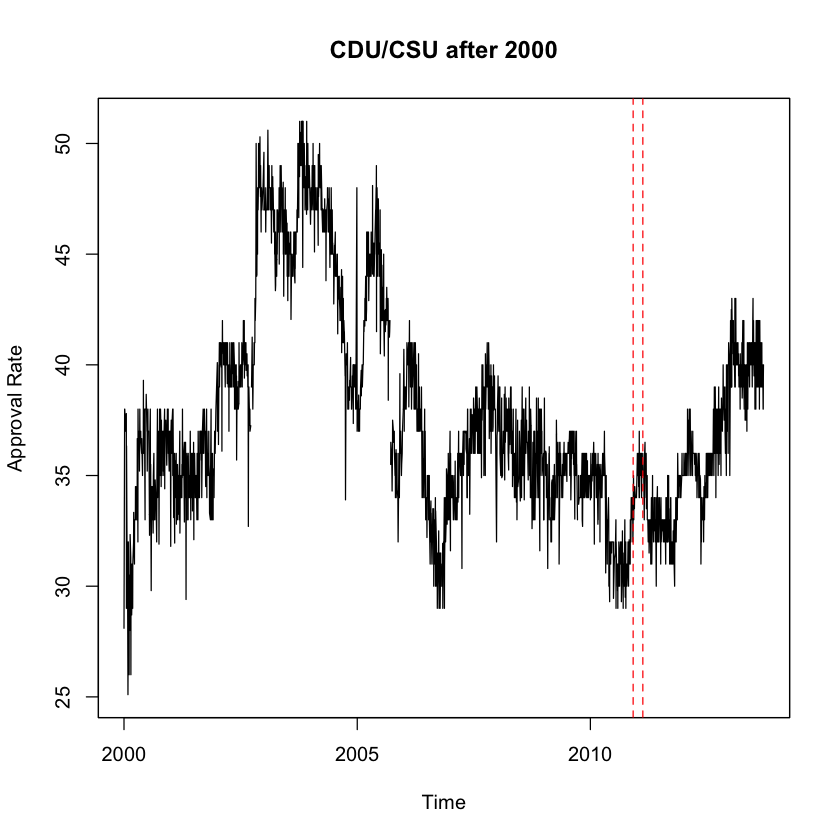

In [38]:
plot(geroar$CDU, main="CDU/CSU after 2000", xlab="Time", ylab="Approval Rate")
abline(v=time(geroar$CDU)[3989], lty=2, col="red")
abline(v=time(geroar$CDU)[4065], lty=2, col="red")

plot FDP after 2000

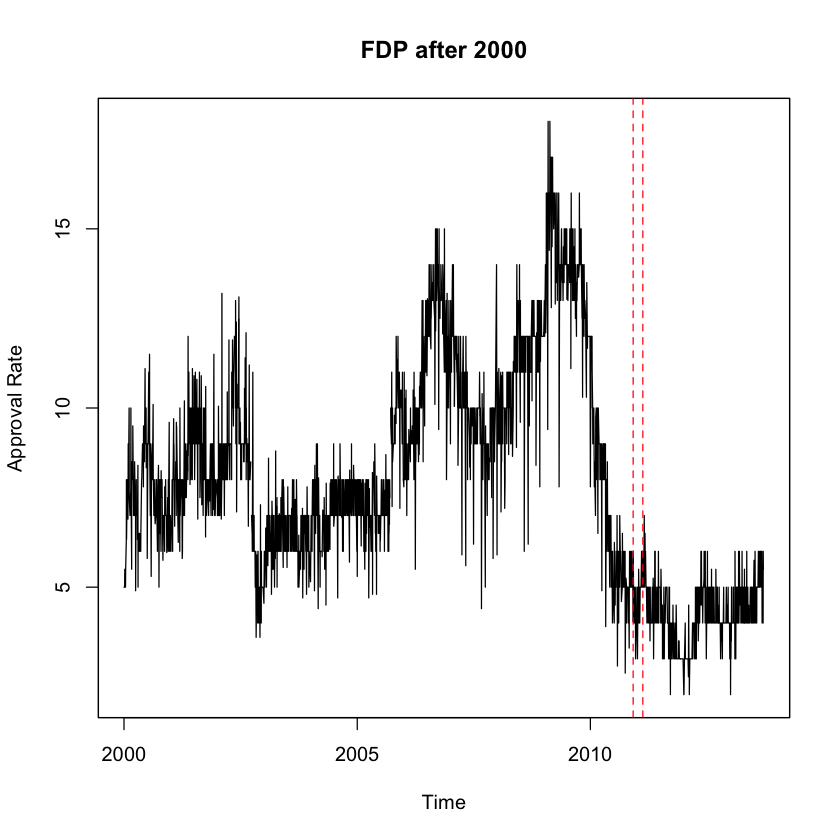

In [39]:
plot(geroar$FDP, main="FDP after 2000", xlab="Time", ylab="Approval Rate")
abline(v=time(geroar$CDU)[3989], lty=2, col="red")
abline(v=time(geroar$CDU)[4065], lty=2, col="red")

data after A.M. became the PM

In [40]:
geram <- ger[ger$date >= "2005-11-22",]

reducing the data

In [41]:
geramr <- cbind(geram$poll_p1_ipo, geram$poll_p4_ipo)

create the daily times series data

In [42]:
geramr <- zoo(geramr, geram$date)

name the column (don't need for date)

In [43]:
colnames(geramr) <- c("CDU/CSU", "FDP")

plot the data

searching for the index of the date when scandal happend

In [44]:
which(time(geramr)=="2010-11-28")

[1] 1833

create values for vline, one for each panel

In [46]:
vlines <- c(v=time(geramr)[1833], v=time(geramr)[1833])

plot multiple zoo plots

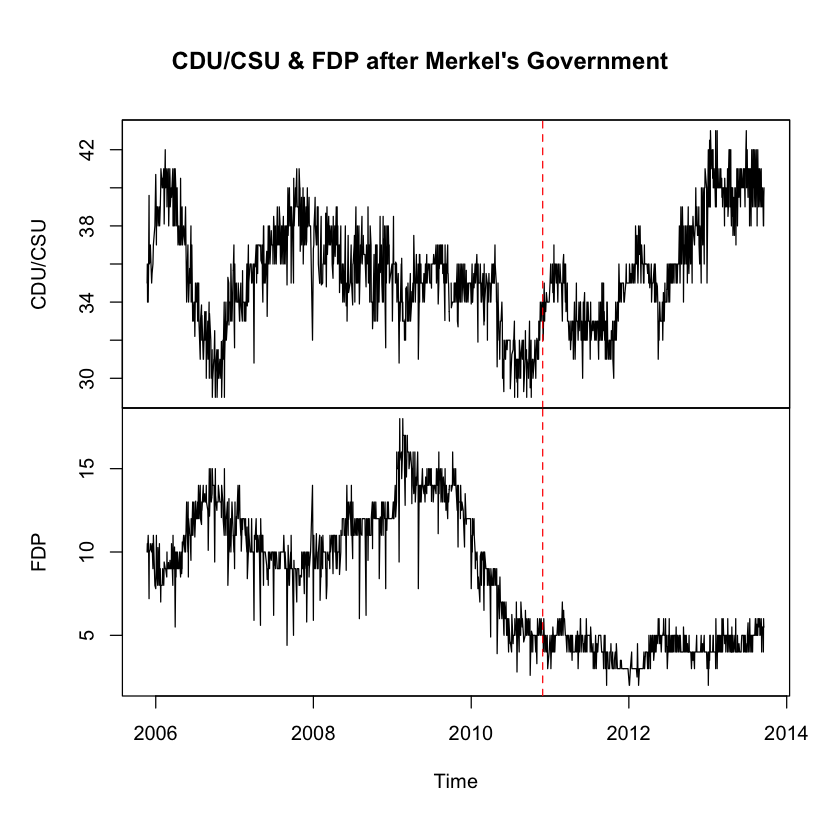

In [47]:
plot(geramr, panel=v.panel, main="CDU/CSU & FDP after Merkel's Government", xlab="Time")